### Team members: Taleen Barakeh, Riley Nickel and Lior Ben David

Contributions:
* Lior- Part 1 to 6
* Riley- AUC graphs, part 7 and 8
* Taleen- trees visualizations and part 6

# Set Up

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# access to data file
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

# Part 1- Data Source and Content

### Q1. Why does it makes sense to discretize columns for this problem?
1. Aligns the model better with the nature of the data.
2. When categorizing continuous variables, it becomes easier to understand and explain the model's decisions.
3. Numerical data would require more splits and create larger more complex trees. The model can split the data more efficiently with categorical columns.
4. Categorical columns can make the trained tree more generalized and potentially get better results.

### Q2. What might be the issues (if any) if we DID NOT discretize the columns?

1. It may lead to a series of complications when handling the continuous data.
2. Sensitivity to outliers
3. model could become less interpretable (harder to understand)

# Part 2- Data Quality Analysis

In [ ]:
 # display top 5 rows to understand structure
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
# shape of the dataset
df.shape

(48842, 11)

In [ ]:
# dataset columns data types
pd.set_option('display.max_rows', None)
df.dtypes

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object

In [ ]:
# check for missing values
df.isnull().sum()

# no missing values to handle

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
# descriptive statistics of the numerical column
df.describe()
# not so relevant because it is a dummy (binary) column with only 1 and 0 so we wont exclude outliers. Moreover, this is the target column.

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# descriptive statistics of the categorical columns
df.select_dtypes('object').describe()

# for categorical columns outliers should not be excluded.

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


In [ ]:
# Get unique values in the column
for column in df.columns:
    print(column)
    unique_values = df[column].unique()
    print(unique_values)

hours_per_week_bin
['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']
occupation_bin
['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']
msr_bin
['b. Mid' 'c. High' 'a. Low']
capital_gl_bin
['c. > 0' 'a. = 0' 'b. < 0']
race_sex_bin
['c. High' 'b. Mid' 'a. Low']
education_num_bin
['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']
education_bin
['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']
workclass_bin
['b. income' 'a. no income']
age_bin
['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']
flag
['train' 'test']
y
[0 1]


In [ ]:
# separating categorical and numerical columns
cat_cols = df.select_dtypes('object')
num_cols = df.select_dtypes('int')

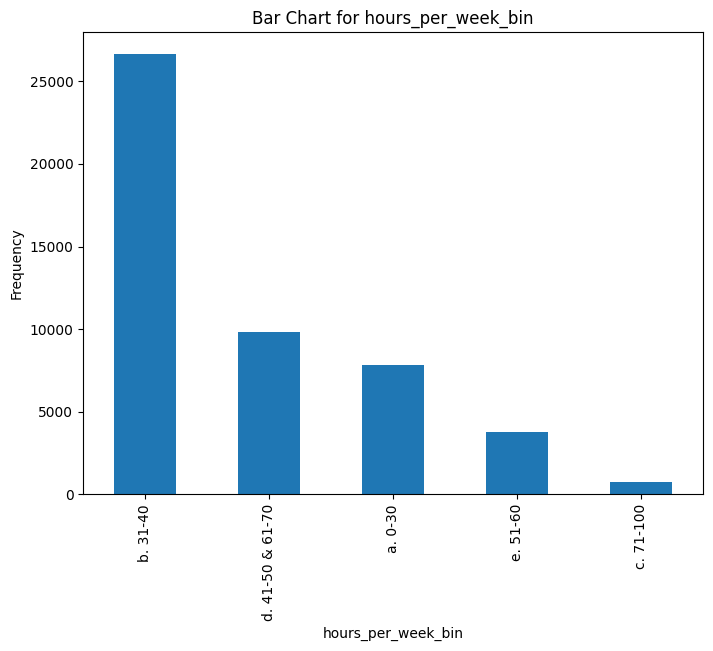

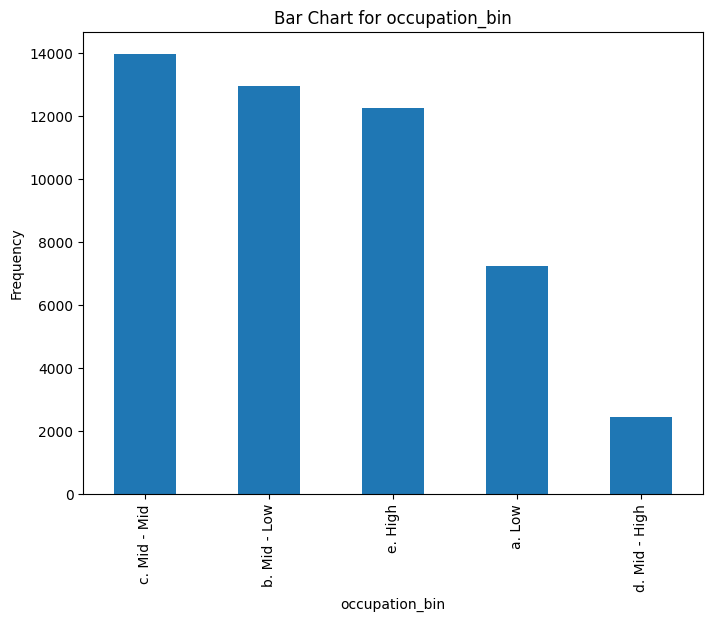

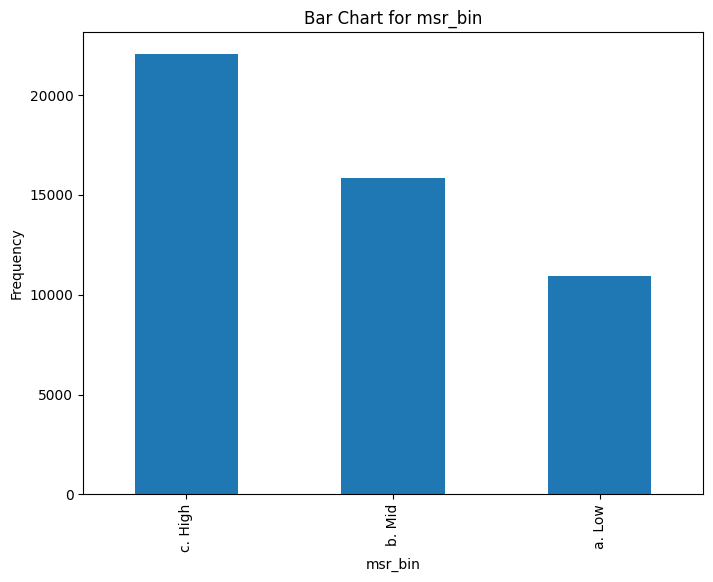

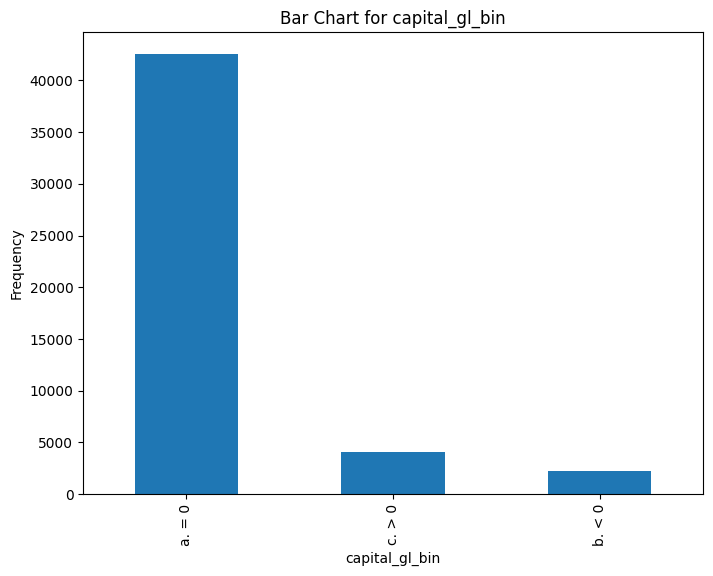

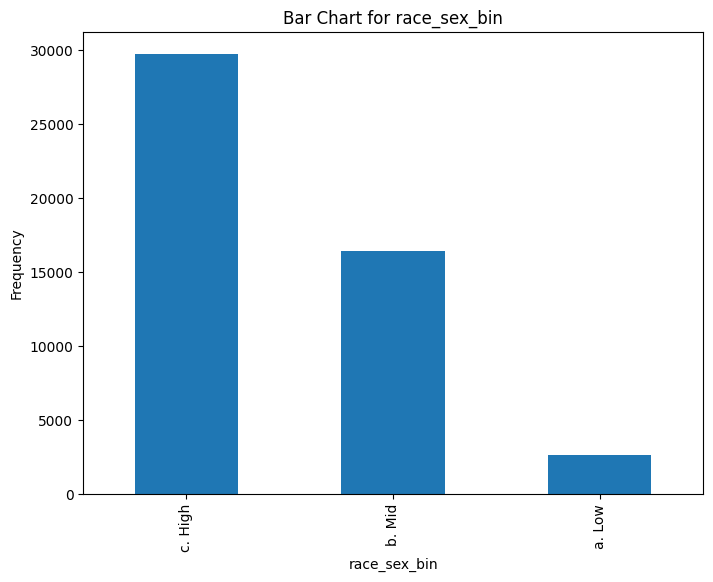

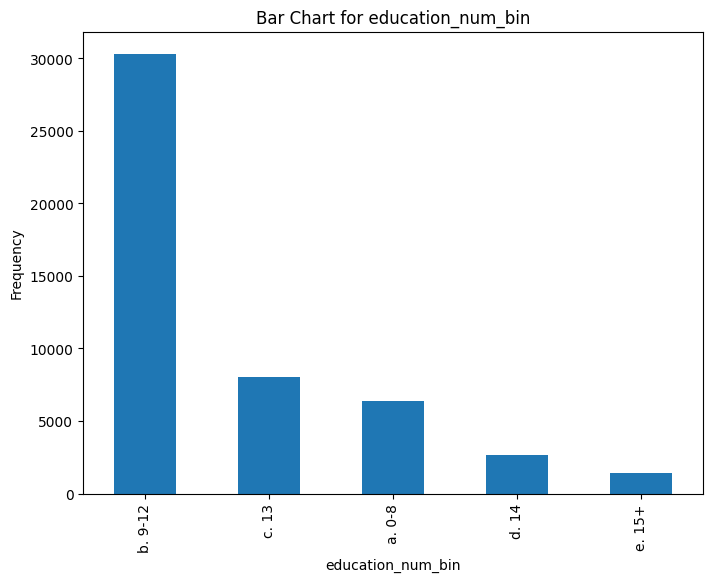

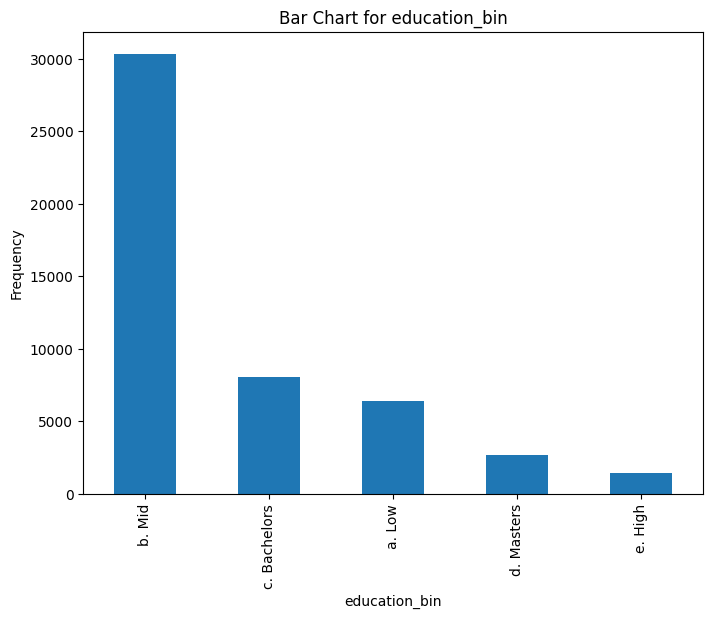

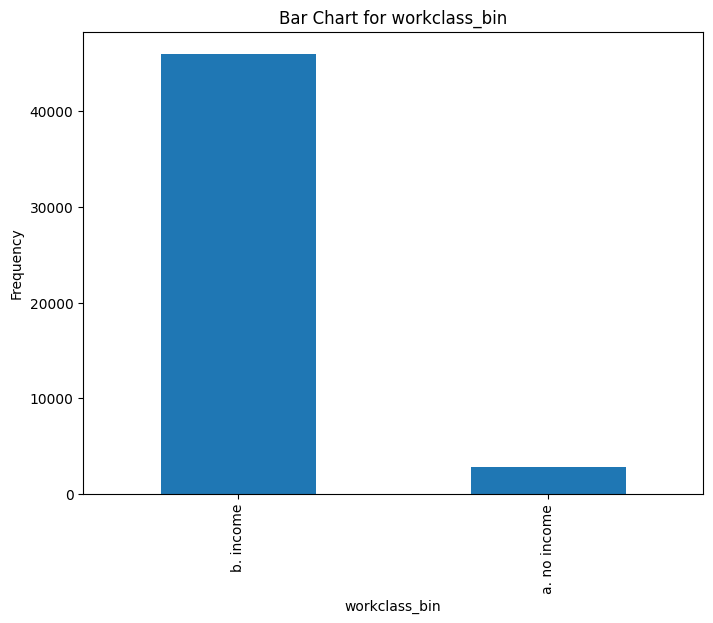

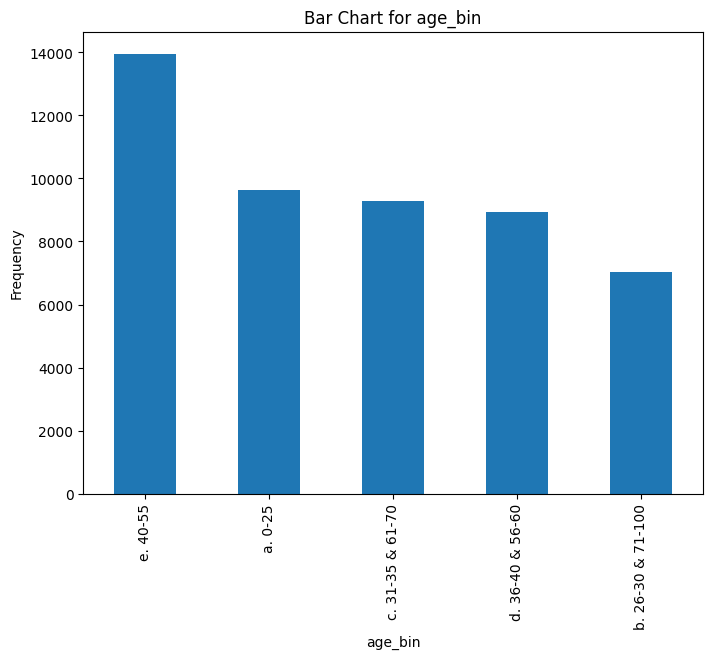

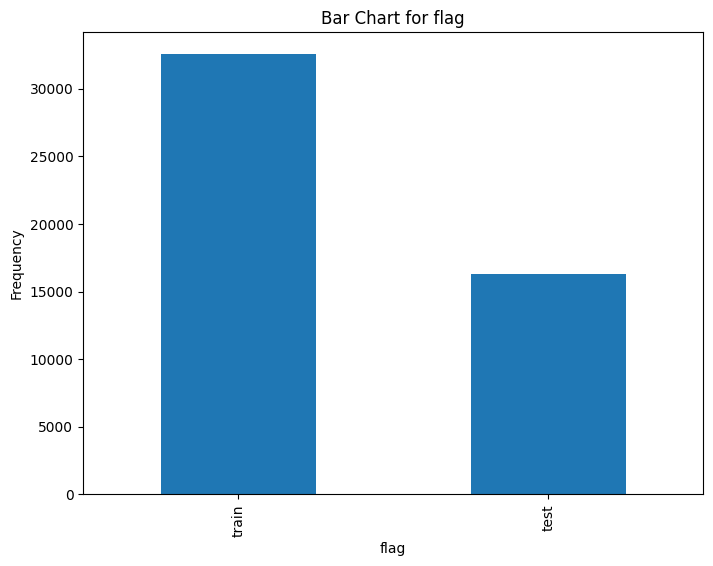

In [ ]:
# create barchart for each categorical column
for column in cat_cols:
    category_counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# flag column will be use to split the data into train and test datasets

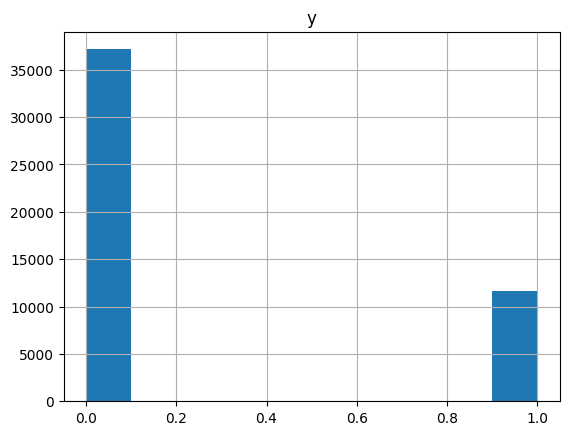

In [ ]:
# create histogram for the numerical column
num_cols.hist()
plt.show()

# this is the target classes: '>50K' and '<=50K' Labels: 1, 0

In this part we found no missing values in the dataset nor outliers to remove. The “continuous” data columns have been already “transformed” into certain “data groups” or “data blocks”. Therefore, based on the DQA, the only transformation needed is encode the categorical into numerical values and prepare the data to train and test the ML decision tree.  

In [ ]:
# separating the flag column to create train dataset and test dataset
train_df = df[df['flag'] == 'train']
test_df = df[df['flag'] == 'test']

In [ ]:
# clean the datasets from the "flag" column
train_df = train_df.drop(columns=['flag'])
test_df = test_df.drop(columns=['flag'])

In [ ]:
feature_columns = ['hours_per_week_bin', 'occupation_bin',	'msr_bin',	'capital_gl_bin',	'race_sex_bin',	'education_num_bin', 'education_bin',	'workclass_bin',	'age_bin']
target_column = 'y'

In [ ]:
# Build the feature matrices and target arrays for train and test datasets
X_train = train_df[feature_columns]
y_train = train_df[target_column]

X_test = test_df[feature_columns]
y_test = test_df[target_column]
X_train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100


In [ ]:
# import library to help encode the categorical columns to numerical to prepare the data
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns and their unique values
categorical_columns = {
    'hours_per_week_bin': ['b. 31-40', 'a. 0-30', 'd. 41-50 & 61-70', 'c. 71-100', 'e. 51-60'],
    'occupation_bin': ['b. Mid - Low', 'e. High', 'a. Low', 'c. Mid - Mid', 'd. Mid - High'],
    'msr_bin': ['b. Mid', 'c. High', 'a. Low'],
    'capital_gl_bin': ['c. > 0', 'a. = 0', 'b. < 0'],
    'race_sex_bin': ['c. High', 'b. Mid', 'a. Low'],
    'education_num_bin': ['c. 13', 'b. 9-12', 'a. 0-8', 'd. 14', 'e. 15+'],
    'education_bin': ['c. Bachelors', 'b. Mid', 'a. Low', 'd. Masters', 'e. High'],
    'workclass_bin': ['b. income', 'a. no income'],
    'age_bin': ['d. 36-40 & 56-60', 'e. 40-55', 'b. 26-30 & 71-100', 'c. 31-35 & 61-70', 'a. 0-25']
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# for X_train
# Iterate over all categorical columns and transform them into numerical columns
for col, values in categorical_columns.items():
    label_encoder.fit(values)
    X_train[col] = label_encoder.transform(X_train[col])

X_train.head()

<ipython-input-17-529698dbee24>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = label_encoder.transform(X_train[col])
<ipython-input-17-529698dbee24>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = label_encoder.transform(X_train[col])
<ipython-input-17-529698dbee24>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,1,1,1,2,2,2,2,1,3
1,0,4,2,0,2,2,2,1,4
2,1,0,1,0,2,1,1,1,3
3,1,0,2,0,1,0,0,1,4
4,1,4,2,0,0,2,2,1,1


In [ ]:
# check the label encode worked well with the number of unique values in each column
X_train.nunique()

hours_per_week_bin    5
occupation_bin        5
msr_bin               3
capital_gl_bin        3
race_sex_bin          3
education_num_bin     5
education_bin         5
workclass_bin         2
age_bin               5
dtype: int64

In [ ]:
# for X-test
# Iterate over all categorical columns and transform them into numerical columns
for col, values in categorical_columns.items():
    label_encoder.fit(values)
    X_test[col] = label_encoder.transform(X_test[col])

X_test.head()

<ipython-input-19-e6ca0caf0e02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = label_encoder.transform(X_test[col])
<ipython-input-19-e6ca0caf0e02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = label_encoder.transform(X_test[col])
<ipython-input-19-e6ca0caf0e02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,1,1,0,0,1,0,0,1,0
32562,3,1,2,0,2,1,1,1,3
32563,1,3,2,0,2,1,1,1,1
32564,1,1,2,2,1,1,1,1,4
32565,0,1,0,0,1,1,1,0,0


In [ ]:
# check the label encode worked well with the number of unique values in each column
X_test.nunique()

hours_per_week_bin    5
occupation_bin        5
msr_bin               3
capital_gl_bin        3
race_sex_bin          3
education_num_bin     5
education_bin         5
workclass_bin         2
age_bin               5
dtype: int64

# Part 3- Build Decision Tree Classifier Models

In [ ]:
# import important library for the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# create the dicision tree - depth 10, random_state 101, min samples leaf 15)
dtree= DecisionTreeClassifier(max_depth=10, random_state= 101, max_features=None, min_samples_leaf=15)

In [ ]:
# train the decision tree classifier
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=101)

In [ ]:
# test the decision tree classifier
y_pred = dtree.predict(X_test)

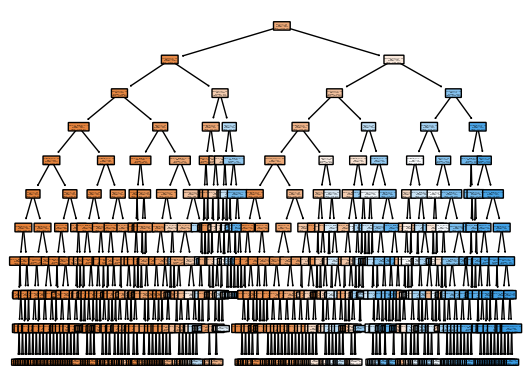

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pydotplus
import matplotlib.pyplot as plt
feature_names = feature_columns
target_names = ['<50K', '>=50K']

plot_tree(dtree,
          feature_names = feature_names,
          class_names = target_names,
          filled = True,
          rounded = True)

plt.savefig('tree_visualization.png')

# Part 4- Evaluate Decision Tree Performance

In [ ]:
# import needed libraries for performance evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: "+str(cm))

Confusion Matrix: [[11607   828]
 [ 1715  2131]]


In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: "+str(accuracy))

Accuracy Score: 0.8438056630428107


In [ ]:
# precision
precision = precision_score(y_test, y_pred)
print("Precision: "+str(precision))

Precision: 0.7201757350456235


In [ ]:
# recall
recall = recall_score(y_test, y_pred)
print("Recall: "+str(recall))

Recall: 0.5540821632865315


In [ ]:
# F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: "+str(f1))

F1 score: 0.6263041880969876


# Part 5- Tune Decision Tree Performance

In [ ]:
# Scikit Learn DecisionTreeClassifier- syntax, hyper-parameters and methods
# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

### Q3. Decision Tree Hyper-parameter variation vs. performance

###Run 1: split criteria (Entropy or Gini)

In [ ]:
# Entropy
dt_run1_entropy= DecisionTreeClassifier(criterion= 'entropy')
dt_run1_entropy.fit(X_train, y_train)
y_pred_ent = dt_run1_entropy.predict(X_test)

# performance measures
accuracy = accuracy_score(y_test, y_pred_ent)
print("Accuracy Score: "+str(accuracy))
precision = precision_score(y_test, y_pred_ent)
print("Precision: "+str(precision))
recall = recall_score(y_test, y_pred_ent)
print("Recall: "+str(recall))
f1 = f1_score(y_test, y_pred_ent)
print("F1 score: "+str(f1))

Accuracy Score: 0.8368036361402862
Precision: 0.6924571058595015
Recall: 0.5561622464898596
F1 score: 0.616870944484499


In [ ]:
# Gini
dt_run1_gini= DecisionTreeClassifier(criterion= 'gini')
dt_run1_gini.fit(X_train, y_train)
y_pred_gini = dt_run1_gini.predict(X_test)

# performance measures
accuracy = accuracy_score(y_test, y_pred_gini)
print("Accuracy Score: "+str(accuracy))
precision = precision_score(y_test, y_pred_gini)
print("Precision: "+str(precision))
recall = recall_score(y_test, y_pred_gini)
print("Recall: "+str(recall))
f1 = f1_score(y_test, y_pred_gini)
print("F1 score: "+str(f1))

Accuracy Score: 0.8366193722744303
Precision: 0.6924075275794939
Recall: 0.5548621944877795
F1 score: 0.6160508083140878


Run 1 results: Gini is slightly better for this dataset, gives a slightly better accuracy

### Run 2: minimum sample leaf

In [ ]:
# options for the minimum sample leaf number
min_sleaf = [5,10,15,20,25,30,35,40]

In [ ]:
# loop through the options and evaluate the performance of each
results= []
for trees in min_sleaf:
  # train and test the models
  model= DecisionTreeClassifier(criterion='gini', min_samples_leaf=trees)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  # performance evaluation
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # create dict to store performance results, append and convert to data frame
  metrics_dict = {'Min Samples Leaf': trees,
                            'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
  results.append(metrics_dict)
  metrics_df = pd.DataFrame(results)

metrics_df

,Min Samples Leaf,Accuracy,Precision,Recall,F1 Score
0,5,0.840059,0.701362,0.562402,0.624242
1,10,0.840305,0.703995,0.559022,0.623188
2,15,0.842024,0.708170,0.563443,0.627570
3,20,0.842516,0.704140,0.574883,0.632980
4,25,0.842762,0.707152,0.570723,0.631655
5,30,0.843069,0.711848,0.563963,0.629334
6,35,0.843007,0.713859,0.559802,0.627514
7,40,0.843069,0.716393,0.555642,0.625860


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# loop through the options and evaluate the performance of each
results= []

train_results = []
test_results = []

for trees in min_sleaf:
  # train and test the models
  model= DecisionTreeClassifier(criterion='gini', min_samples_leaf=trees)
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  y_pred = model.predict(X_test)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

  # performance evaluation
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # create dict to store performance results, append and convert to data frame
  metrics_dict = {'Min Samples Leaf': trees,
                            'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
  results.append(metrics_dict)
  metrics_df = pd.DataFrame(results)

metrics_df

,Min Samples Leaf,Accuracy,Precision,Recall,F1 Score
0,5,0.839936,0.701038,0.562142,0.623954
1,10,0.840305,0.703995,0.559022,0.623188
2,15,0.842024,0.708170,0.563443,0.627570
3,20,0.842516,0.704140,0.574883,0.632980
4,25,0.842762,0.707152,0.570723,0.631655
5,30,0.843069,0.711848,0.563963,0.629334
6,35,0.843007,0.713859,0.559802,0.627514
7,40,0.843069,0.716393,0.555642,0.625860


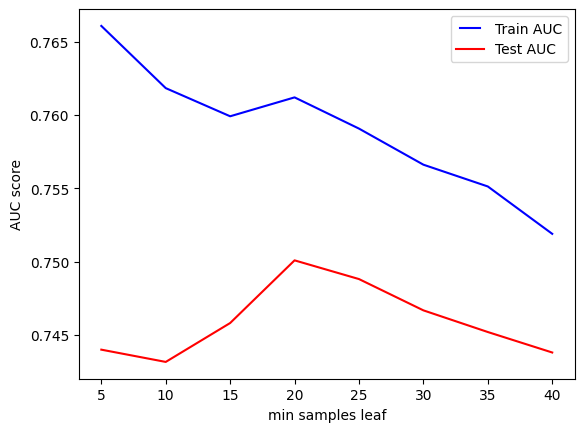

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_sleaf, train_results, "b", label="Train AUC")
line2, = plt.plot(min_sleaf, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

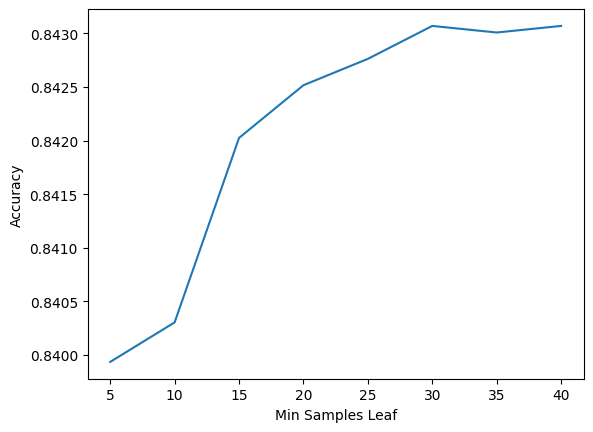

In [ ]:
# line graph Min Samples Leaf Vs. Accuracy
import matplotlib.pyplot as plt

plt.plot(metrics_df['Min Samples Leaf'], metrics_df['Accuracy'], linestyle='-')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.show()

Run 2 results: minimum sample leaf of 40 gives the best accuracy and precision, but minimum sample leaf of 30 gives better recall and f1 score.

### Run 3: maximum feature

In [ ]:
# options for the maximum feature number
max_f = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

max_f_l = ['auto', "None", 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [ ]:
# loop through the options and evaluate the performance of each
results= []

train_results = []
test_results = []

for trees in max_f:
  # train and test the models
  model= DecisionTreeClassifier(criterion='gini', min_samples_leaf=40, max_features=trees)
  model.fit(X_train, y_train)
  train_pred = model.predict(X_train)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  y_pred = model.predict(X_test)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
  # performance evaluation
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # create dict to store performance results, append and convert to data frame
  metrics_dict = {'Max Features': trees,
                            'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
  results.append(metrics_dict)
  metrics_df = pd.DataFrame(results)

metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


,Max Features,Accuracy,Precision,Recall,F1 Score
0,auto,0.838585,0.700593,0.553042,0.618134
1,None,0.843069,0.716393,0.555642,0.625860
2,0.3,0.841779,0.716872,0.545762,0.619722
3,0.4,0.841349,0.704039,0.566563,0.627863
4,0.5,0.841533,0.704854,0.566303,0.628028
5,0.6,0.843376,0.714003,0.562142,0.629037
6,0.7,0.843437,0.707520,0.574883,0.634342
7,0.8,0.844236,0.718333,0.560322,0.629565


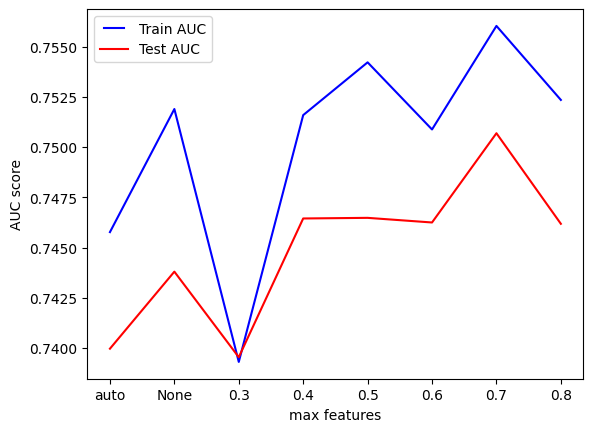

In [ ]:
line1, = plt.plot(max_f_l, train_results, "b", label="Train AUC")
line2, = plt.plot(max_f_l, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

,Max Features,Accuracy,Precision,Recall,F1 Score
2,0.3,0.841779,0.716872,0.545762,0.619722
3,0.4,0.841349,0.704039,0.566563,0.627863
4,0.5,0.841533,0.704854,0.566303,0.628028
5,0.6,0.843376,0.714003,0.562142,0.629037
6,0.7,0.843437,0.707520,0.574883,0.634342
7,0.8,0.844236,0.718333,0.560322,0.629565


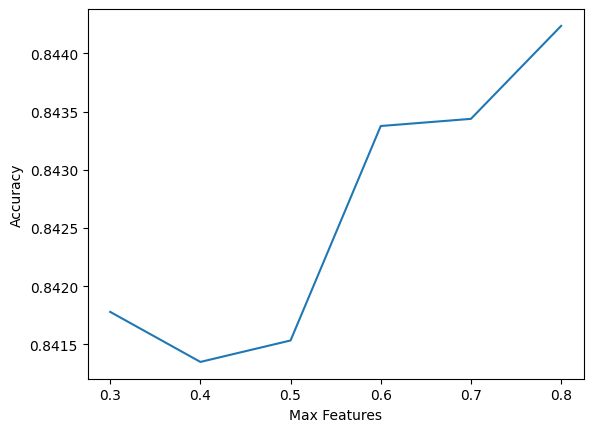

In [ ]:
# line graph Max Features Vs. Accuracy
import matplotlib.pyplot as plt

# drop "auto" and "None" rows (top two rows) to be able to plot it on a graph
metrics_df = metrics_df.drop(index=[0, 1])
display(metrics_df)

# create the graph
plt.plot(metrics_df['Max Features'], metrics_df['Accuracy'], linestyle='-')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.show()

Run 3 results: maximum features of 0.7 gives the best accuracy.
However, when it comes to-
* precision, max features of 0.3 gives the best result
* recall and F1 score, max features of 0.7 gives the best result


Since we are judging the BEST hyper-parameter values with respect to "Accuracy", max features of 0.7 it is.

### Run 4: maximum depth

In [ ]:
# options for the maximum depth values
max_d = [2,4,6,8,10,12,14,16]

In [ ]:
# loop through the options and evaluate the performance of each
results= []
for trees in max_d:
  # train and test the models
  model= DecisionTreeClassifier(criterion='gini', min_samples_leaf=40, max_features=0.7, max_depth=trees)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  # performance evaluation
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # create dict to store performance results, append and convert to data frame
  metrics_dict = {'Max Depth': trees,
                            'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
  results.append(metrics_dict)
  metrics_df = pd.DataFrame(results)

metrics_df

,Max Depth,Accuracy,Precision,Recall,F1 Score
0,2,0.821755,0.715919,0.406916,0.518899
1,4,0.832688,0.688255,0.533281,0.600938
2,6,0.840550,0.743760,0.495840,0.595008
3,8,0.841226,0.733432,0.515081,0.605163
4,10,0.843929,0.716274,0.561882,0.629754
5,12,0.844911,0.721125,0.560062,0.630470
6,14,0.845218,0.718812,0.566303,0.633508
7,16,0.841840,0.714334,0.550702,0.621935


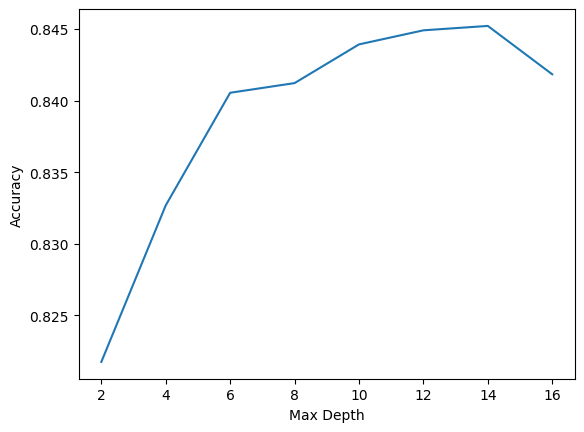

In [ ]:
# line graph Max Depth Vs. Accuracy
import matplotlib.pyplot as plt

plt.plot(metrics_df['Max Depth'], metrics_df['Accuracy'], linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

Run 4 results: maximum depth of 8 gives the best accuracy.
However, when it comes to-
* precision, max depth of 12 gives the best result
* recall and F1 score, max depth of 8 gives the best result


Since we are judging the BEST hyper-parameter values with respect to "Accuracy", max depth of 8 it is.

# Part 6- Visualize Your Best Decision Tree using GraphViz

According to part 5 the hyper-parameter combination of our BEST-performing Tree with respect to "accuracy" is: Split criteria "entropy", minimum sample leaf 40, maximum feature 0.8, and maximum depth 8.

In [ ]:
# build the tree
import time # for runtime calculations of the model training
start_time = time.time() # for runtime calculations
best_tree= DecisionTreeClassifier(criterion='gini', min_samples_leaf=40, max_features=0.7, max_depth=8)
best_tree.fit(X_train, y_train)
end_time = time.time() # for runtime calculations
total_time = end_time - start_time # for runtime calculations
y_pred = best_tree.predict(X_test)

In [ ]:
# performance evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print("Confusion Matrix: "+str(cm))
print("Accuracy Score: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(recall))
print("F1 score: "+str(f1))

Confusion Matrix: [[11546   889]
 [ 1674  2172]]
Accuracy Score: 0.842577237270438
Precision: 0.7095720352825874
Recall: 0.5647425897035881
F1 score: 0.6289271753293759


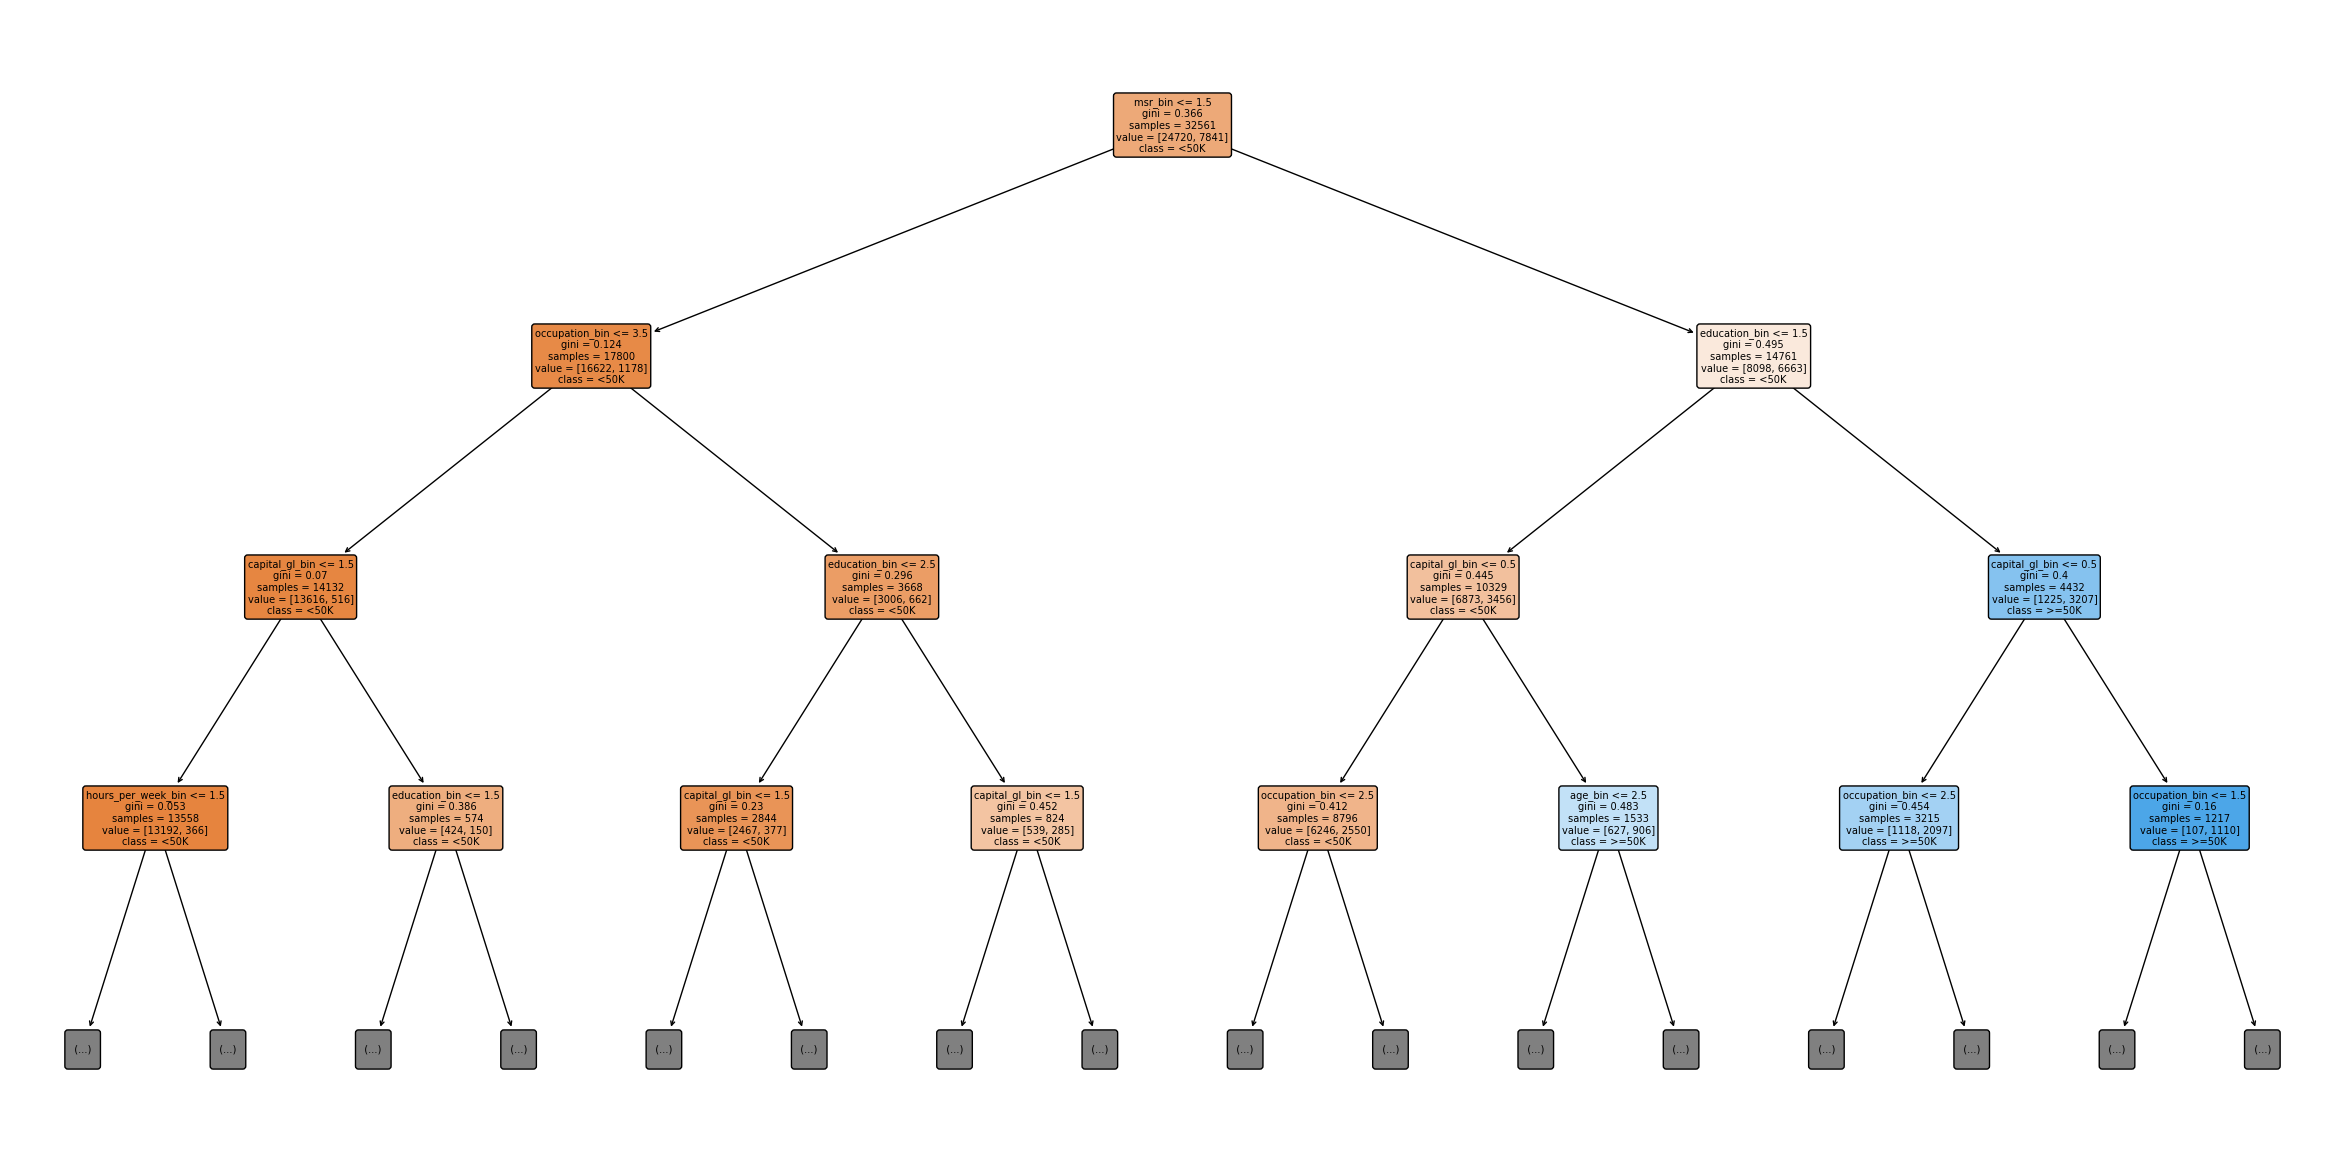

In [ ]:
# tree visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'best_tree' is the trained Decision Tree model
feature_names = feature_columns  # Replace with actual feature names
target_names = ['<50K', '>=50K']

plt.figure(figsize=(30, 15))  # Increase figure size for better visibility
plot_tree(best_tree,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          max_depth=3)  # You might adjust this for more depth

plt.rcParams.update({'font.size': 16})  # Increase font size
plt.savefig('tree_visualization.svg', format='svg')  # Save as vector graphic
plt.show()


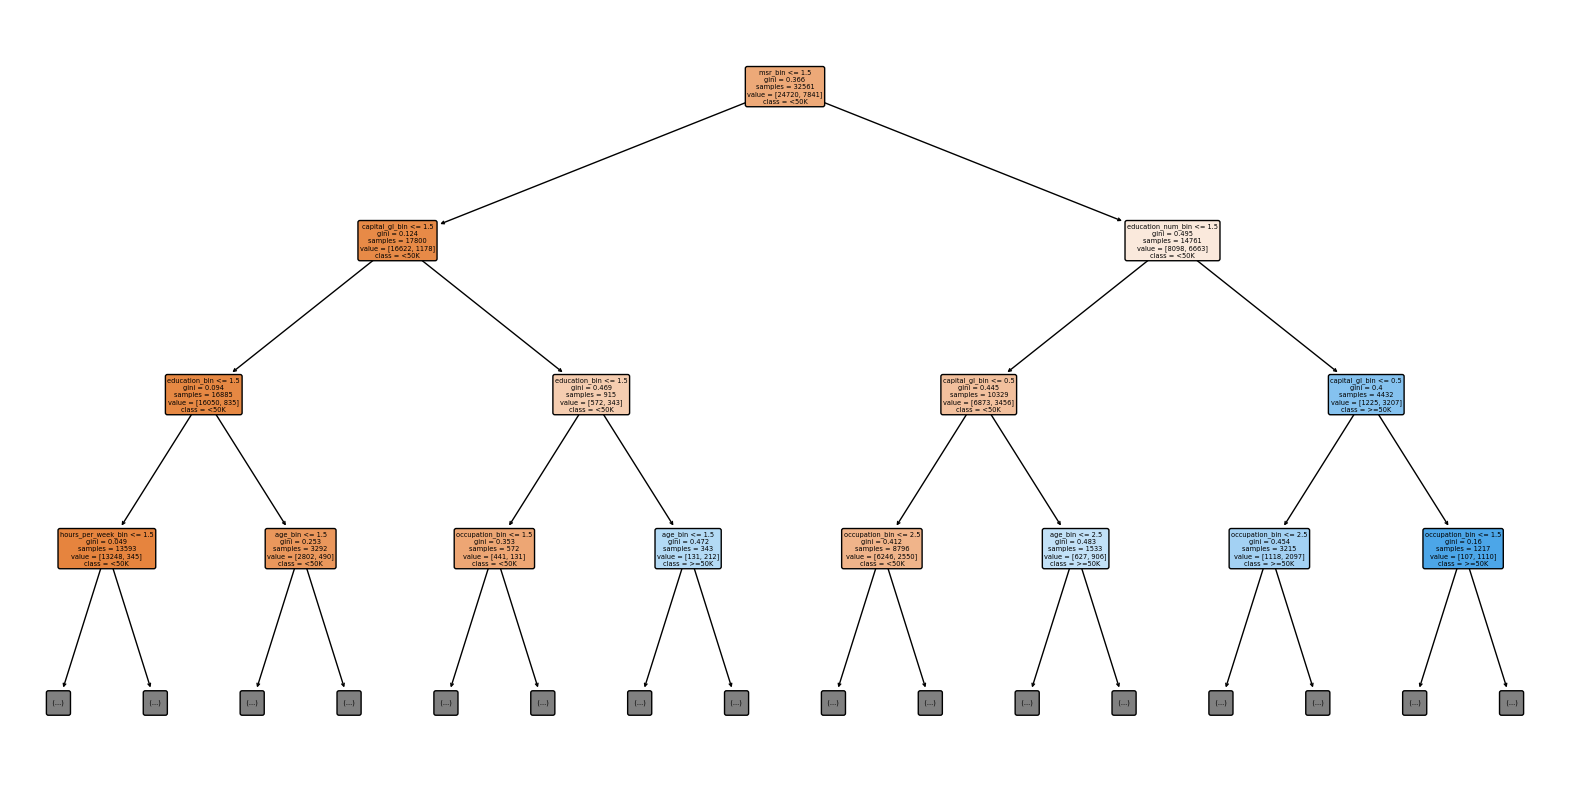

In [ ]:
# tree visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'dtree' is the trained Decision Tree model and 'feature_columns' contains the names of the features
feature_names = feature_columns
target_names = ['<50K', '>=50K']

# Set a larger figure size to make the plot clearer
plt.figure(figsize=(20,10))

# Plot the decision tree with a max_depth parameter to limit the number of levels of the tree displayed
plot_tree(dtree,
          feature_names = feature_names,
          class_names = target_names,
          filled = True,
          rounded = True,
          max_depth=3)  # Limit the depth for clarity

# Adjust font size for readability
plt.rcParams.update({'font.size': 14})

plt.show()  # Show the plot in the output cell of the notebook


# Part 7- Conclusion

### Q4. How long was your total run time to train the best model?



In [ ]:
print("Total runtime to train the model: "+str(total_time)+" seconds")

Total runtime to train the model: 0.029952049255371094 seconds



### Q5. Did you find the BEST TREE?
Based on "accuracy" and the 4 runs we did the best tree use gini for split criteria "entropy" has minimum sample leaf of 40, maximum features of 0.7, and maximum depth of 8. However, this tree might not be the best tree as we did everything manually and didn't exemine all other options of different hyper-parameters or different combinations of them. Moreover, the "BEST tree" we found is only based on accuracy and not nesseccarily other performance indicators.  

### Q5. Write your observations from the visualization of the best tree.
-- Tree Depth: Only three levels of the tree are visible, indicating that an attempt was made to keep the model reasonably simple and avoid overfitting.
Use of Features: Some features are important in predicting the target variable because they are used for splits at the root of the tree and higher levels.--

### Q5. Will this tree "overfit"?
There is a chance this tree will overfit since we have fewer features to train the model on and our max depth is 8.

# Part 8- Prediction using your "trained" Decision Tree Model

 Hours Worked per Week = 48
• Occupation Category = Mid - Low
• Marriage Status & Relationships = High
• Capital Gain = Yes
• Race-Sex Group = Mid
• Number of Years of Education = 12
• Education Category = High
• Work Class = Income
• Age = 58

In [ ]:
# Create dataframe with each category defined as above
new_df = pd.DataFrame({
    'hours_per_week_bin': ['d. 41-50 & 61-70'],
    'occupation_bin': ['b. Mid - Low'],
    'msr_bin': ['c. High'],
    'capital_gl_bin': ['c. > 0'],
    'race_sex_bin': ['b. Mid'],
    'education_num_bin': ['b. 9-12'],
    'education_bin': ['e. High'],
    'workclass_bin': ['b. income'],
    'age_bin': ['d. 36-40 & 56-60']
})

In [ ]:
new_df # view dataframe

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,d. 41-50 & 61-70,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,e. High,b. income,d. 36-40 & 56-60


In [ ]:
# Use encoder defined earlier to convert to numerical values
# Iterate over all categorical columns and transform them into numerical columns
for col, values in categorical_columns.items():
    label_encoder.fit(values)
    new_df[col] = label_encoder.transform(new_df[col])

new_df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,3,1,2,2,1,1,4,1,3


In [ ]:
# Use best decision tree model to make guess
# Use if statement to print result in readable format
if best_tree.predict(new_df)[0] == 1:
  print("Income is less than or equal to 50K")
else:
  print("Income is greater than 50K")

Income is less than or equal to 50K


In [ ]:
# Use predict_proba to get probability associated with each outcome
# output of predict proba is a list within an array where the first item in the list is probability of 0 and the second item is probability of 1
prob_0 = best_tree.predict_proba(new_df)[0][0] # pull probability of 0 from list
prob_1 = best_tree.predict_proba(new_df)[0][1] # pull probability of 1 from list

print(f"Probability income is less than or equal to 50K is {round(prob_0*100,2)}%")
print(f"Probability income is greater than 50K is {round(prob_1*100,2)}%")

Probability income is less than or equal to 50K is 23.94%
Probability income is greater than 50K is 76.06%


### Q8. What is the probability that your prediction for this person is correct?
The probability that we are correct is 71.43%